## load libraries

/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing


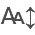

In [2]:
import scanpy as sc
import scvi
import pandas as pd
import seaborn as sns
import polars as pl
import pyarrow
from itables import init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
init_notebook_mode(all_interactive=True)

## load data

In [ ]:
adata = sc.read_h5ad("../data/hlca_normalized_hvgs.h5ad")


In [4]:
adata


AnnData object with n_obs × n_vars = 584944 × 4000
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', 'o

In [5]:
adata.raw.to_adata()


AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

## Dimensionality reduction: Principal components analysis

Scaling and log transformation

In [ ]:
sc.pp.scale(adata) # z normalize the columns (genes)
sc.tl.pca(adata) #defaul top 50 components

In [8]:
adata.obsm["X_pca"].shape


(584944, 50)

In [9]:
sc.pp.neighbors(adata) # compute nearest neighbors


In [10]:
adata

AnnData object with n_obs × n_vars = 584944 × 4000
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', 'o

In [11]:
sc.tl.umap(adata)

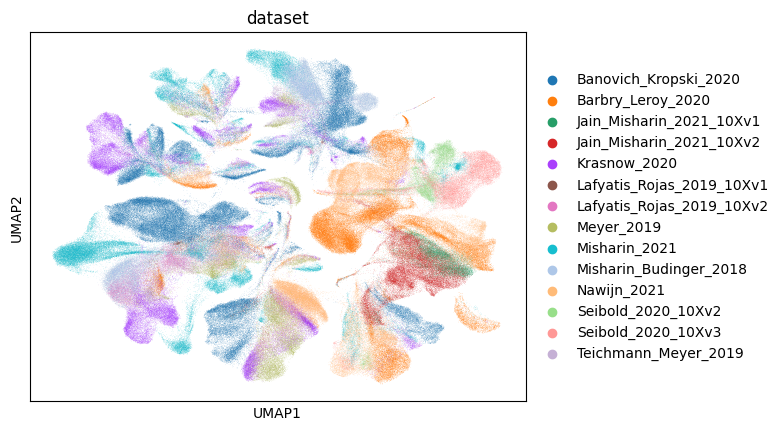

In [14]:
sc.pl.umap(adata,
           color="dataset",
           save="/../../../figures/umap_before_integration.png")


## With integration with scVI

In [3]:
adata = sc.read_h5ad("../data/An_Integrated_Cell_Atlas_of_the_Human_Lung.h5ad")


In [4]:
adata.X = adata.raw.X.copy()

In [6]:
adata

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [4]:
scvi.model.SCVI.setup_anndata(adata, batch_key="dataset")

In [ ]:
model = scvi.model.SCVI(adata)

In [6]:
model.view_anndata_setup(adata)


Anndata setup with scvi-tools version 1.2.0.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'dataset',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   14   │
│         n_cells          │ 584944 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   1    │
│          n_vars          │ 27957  │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                           batch State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location    ┃        Categories         ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['dataset'] │   Banovich_Kropski_2020   │          0          │
│                      │     Barbry_Leroy_2020     │          1          │
│                      │ Jain_Misharin_2021_10Xv1  │          2          │
│                      │ Jain_Misharin_2021_10Xv2  │          3          │
│                      │       Krasnow_2020        │          4          │
│                      │ Lafyatis_Rojas_2019_10Xv1 │          5          │
│                      │ Lafyatis_Rojas_2019_10Xv2 │          6          │
│                      │        Meyer_2019         │          7          │
│                      │       Misharin_2021       │          8          │
│                      │  Misharin_Budinger_2018   │          9          │
│                      │        Nawijn_2021        │         10          │
│                      │    Seibold_2020_10Xv2     │         11          │
│                      │    Seibold_2020_10Xv3     │         12          │
│                      │   Teichmann_Meyer_2019    │         13          │
└──────────────────────┴───────────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [ ]:
model.train()
model.save("hlca_core_scvi", overwrite=True)

In [5]:
model = scvi.model.SCVI.load('../models/hlca_core_scvi-first', adata)


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File ../models/hlca_core_scvi-first/model.pt already downloaded                                           


/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, ma

In [6]:
adata.obsm["X_scvi"] = model.get_latent_representation()


In [7]:
adata.obsm["X_scvi"].shape

(584944, 10)

In [ ]:
# currently needs too much ram memory! we could try usin only hvgs
adata.layers["scvi_expr"] = model.get_normalized_expression(adata, n_samples=1, return_mean=True)


In [8]:
sc.pp.neighbors(adata, use_rep="X_scvi", metric="correlation")


In [9]:
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=1.2)


/tmp/ipykernel_238633/3319688654.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added="leiden_scvi", resolution=1.2)


In [10]:
sc.tl.umap(adata, min_dist=0.4)

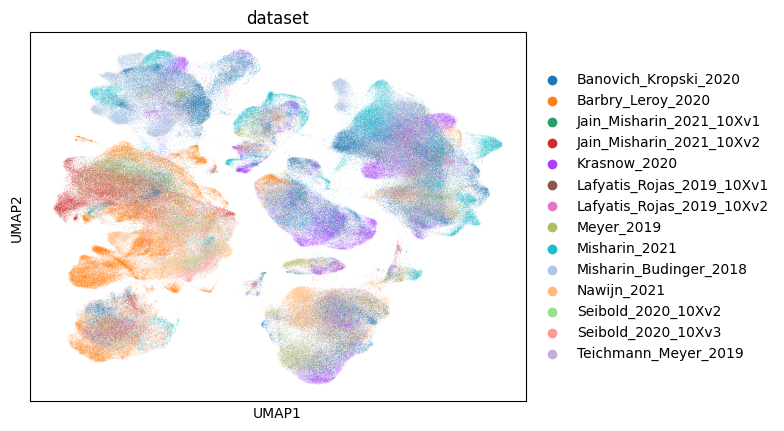

In [3]:
sc.pl.umap(
    adata,
    color=["dataset"],
    ncols=1,
    save="/../../../figures/umap__after_integration.png"
)

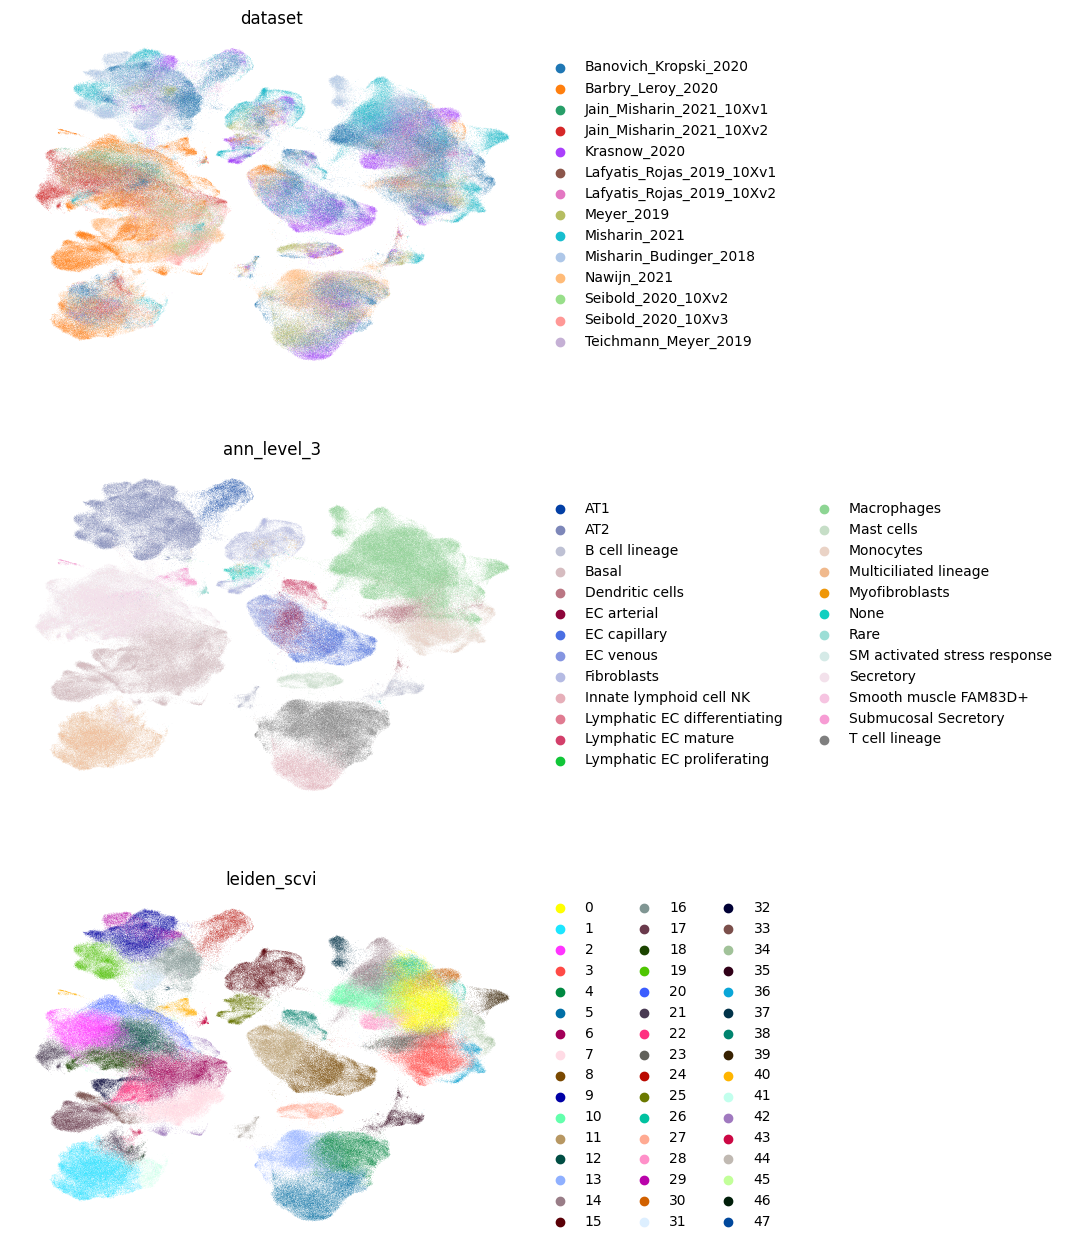

In [12]:
sc.pl.umap(
    adata,
    color=["dataset", "ann_level_3", "leiden_scvi"],
    frameon=False,
    ncols=1,
    save="/../../../figures/umap__after_integration.png"
)

In [13]:
adata

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [14]:
adata.write("../data/hlca_after_integration.h5ad")


## level 1 annotation

In [3]:
adata = sc.read_h5ad("../data/hlca_after_integration.h5ad")


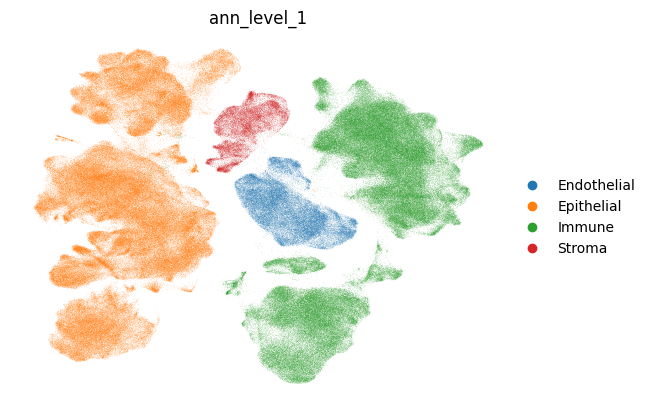

In [7]:
sc.pl.umap(
    adata,
    color=["ann_level_1"],
    frameon=False,
    ncols=1,
    save="/../../../figures/umap__after_integration_ann_level_1.png"
)

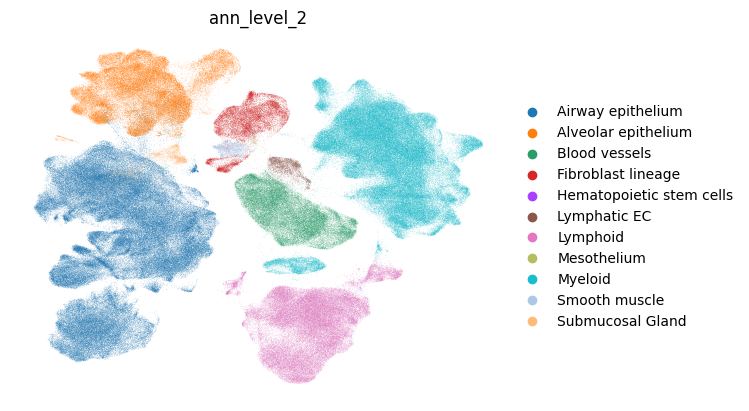

In [8]:
sc.pl.umap(
    adata,
    color=["ann_level_2"],
    frameon=False,
    ncols=1,
    save="/../../../figures/umap__after_integration_ann_level_2.png"
)

## sub clustering

In [3]:
adata = sc.read_h5ad("../data/hlca_after_integration.h5ad")


In [8]:
adata

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [3]:
# Subset the main dataset to include only immune cells
immune_adata = adata[adata.obs["original_ann_level_1"] == "Immune"].copy()


In [7]:
immune_adata

AnnData object with n_obs × n_vars = 226650 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

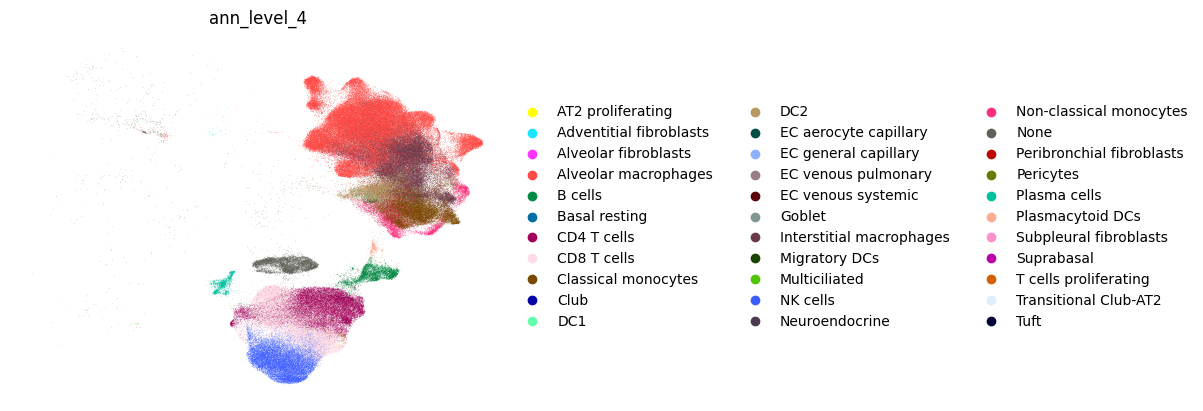

In [9]:
sc.pl.umap(
    immune_adata,
    color=["ann_level_4"],
    frameon=False,
    ncols=1
    #save="/../../../figures/umap__after_integration_ann_level_2.png"
)

In [4]:
sc.pp.neighbors(immune_adata, use_rep="X_scvi", metric="correlation")


In [5]:
sc.tl.leiden(immune_adata,
             key_added="leiden_scvi",
             resolution=1)


/tmp/ipykernel_269568/1260173215.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(immune_adata,


In [6]:
sc.tl.umap(immune_adata, min_dist=0.4)

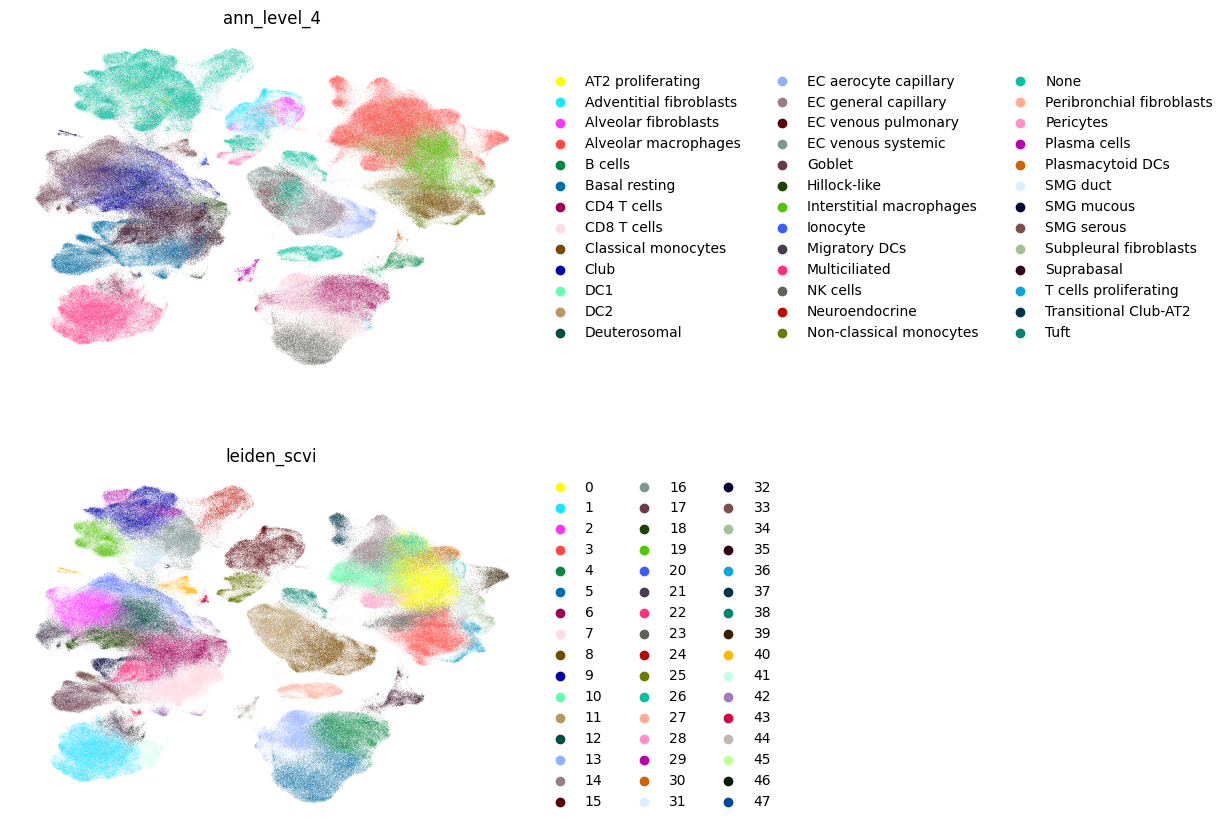

In [7]:
sc.pl.umap(
    adata,
    color=[ "ann_level_4", "leiden_scvi"],
    frameon=False,
    ncols=1,
    save="/../../../figures/umap__after_integration_subcluster_immune.png"
)

## nested clustering

In [1]:
adata = sc.read_h5ad("../data/hlca_after_integration.h5ad")


NameError: name 'sc' is not defined

In [ ]:
adata

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [4]:
# Subset the main dataset to include only immune cells
immune_adata = adata[adata.obs["original_ann_level_1"] == "Immune"].copy()


In [5]:
def add_nested_clustering_blind(
    adata,
    cluster_label_previous,
    cluster_label_new,
    use_rep,
    cluster_alg="leiden",
    cluster_res=0.2,
    cluster_k=30,
    min_cluster_size=50,
    redo_pca=True,
    verbose=True,
):
    """Function that goes through one round of clustering of already existing
    clusters, based on the input cluster df. All clusters will be reclustered 
    individually. ("blind" because we don't take into account annotation
    purity of clusters.) 
    Args:
        adata - anndata object to be clustered
        cluster_label_previous - parent cluster label
        cluster_label_new - label for new clustering
        use_rep - name of .obsm object to be used for neighbor graph
        cluster_alg - <"leiden","phenograph">
        cluster_res - only applicable when using "leiden" as cluster_alg
        cluster_k - only applicable when using "phenograph" as cluster_alg.
        min_cluster_size - only applicable when using "phenograph" as cluster_alg
            Make sure that cluster_k < min_cluster_size
        redo_pca - boolean. whether to re-calculate PCA for subclusters
        verbose - boolean
    Returns adata with new clustering (under adata.obs[cluster_label_new].
    """
    # copy original clustering
    clusters_previous = adata.obs[cluster_label_previous].tolist()
    adata.obs[cluster_label_new] = clusters_previous
    if not redo_pca:
        print("Not re-doing pca before nested clustering iterations!")
    for cluster in sorted(set(clusters_previous)):
        if verbose:
            print("Cluster:", cluster)
        subadata = adata[adata.obs[cluster_label_previous] == cluster, :].copy()
        if subadata.shape[0] < min_cluster_size:
            if verbose:
                print("cluster size smaller than", min_cluster_size, "\n")
            continue
        if verbose:
            print("reclustering...\n")
        if redo_pca:
            if verbose:
                print("running pca...")
            sc.tl.pca(subadata)
        if cluster_alg == "leiden":
            if verbose:
                print("calculating 30 nearest neighbors")
                print("using rep:", use_rep)
            sc.pp.neighbors(subadata, n_neighbors=30, use_rep=use_rep)
            if verbose:
                print("clustering")
            sc.tl.leiden(subadata, resolution=cluster_res, key_added=cluster_label_new)
        elif cluster_alg == "phenograph":
            subadata.obs[cluster_label_new] = pd.Categorical(
                sce.tl.phenograph(subadata.obsm[use_rep], k=cluster_k)[0]
            )
        else:
            raise ValueError("Your cluster_alg argument is incorrect.")
        subadata.obs[cluster_label_new] = [
            "{}.{}".format(cluster, new_cluster)
            for new_cluster in subadata.obs[cluster_label_new]
        ]
        adata.obs.loc[subadata.obs.index, cluster_label_new] = subadata.obs[
            cluster_label_new
        ]
    # order categories "numerically" (so not 1, 10, 11 but 1, 2, 3... 10, 11):
    # convert all cluster names to strings, instead of a mix of strings and ints:
    adata.obs[cluster_label_new] = [
        str(clust) for clust in adata.obs[cluster_label_new]
    ]
    cluster_numbers = list(sorted(set(adata.obs[cluster_label_new])))
    prefix_cluster = [float(x.split(".")[0]) for x in cluster_numbers]
    cluster_numbers_ordered = [
        cluster_numbers[idx] for idx in np.argsort(prefix_cluster)
    ]
    adata.obs[cluster_label_new] = pd.Categorical(
        adata.obs[cluster_label_new], categories=cluster_numbers_ordered
    )

    return adata


In [6]:
number_of_clust_levels = 3  # Number of nested levels you want to perform
use_rep = "X_scvi"   
redo_pca = False            


In [7]:
for clustering_level in range(2, number_of_clust_levels + 1):  # Start at level 2
    print("clustering level:", clustering_level, "...")
    
    # Nested clustering
    previous_clustering = f"leiden_{clustering_level - 1}"  # Start with leiden_1 as the previous level
    cluster_name = f"leiden_{clustering_level}"
    
    # Parameters for different levels
    if clustering_level == 2:
        k = 30
        min_cluster_size = 50
    elif clustering_level == 3:
        k = 15
        min_cluster_size = 30
    elif clustering_level == 4:
        k = 10
        min_cluster_size = 10
    else:
        raise ValueError("Unexpected clustering level")
    
    immune_adata = add_nested_clustering_blind(
        adata=immune_adata,
        cluster_label_previous=previous_clustering,
        cluster_label_new=cluster_name,
        use_rep=use_rep,
        cluster_alg="leiden",
        cluster_res=0.2,
        cluster_k=k,
        min_cluster_size=min_cluster_size,
        redo_pca=redo_pca,
        verbose=True,
    )
    
# Final output:
print("Nested clustering completed.")


clustering level: 2 ...
Not re-doing pca before nested clustering iterations!
Cluster: 0
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 1


/tmp/ipykernel_297102/1812088544.py:57: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(subadata, resolution=cluster_res, key_added=cluster_label_new)


reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 2
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
clustering level: 3 ...
Not re-doing pca before nested clustering iterations!
Cluster: 0.0
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 0.1
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 0.2
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 0.3
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 1.0
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 1.1
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 1.10
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 1.2
reclustering...

calculating 30 nearest neighbors
using rep: X_scvi
clustering
Cluster: 1.3
rec

In [9]:
immune_adata

AnnData object with n_obs × n_vars = 226650 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [9]:
immune_adata

AnnData object with n_obs × n_vars = 226650 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [8]:
sc.tl.umap(immune_adata, min_dist=0.4)

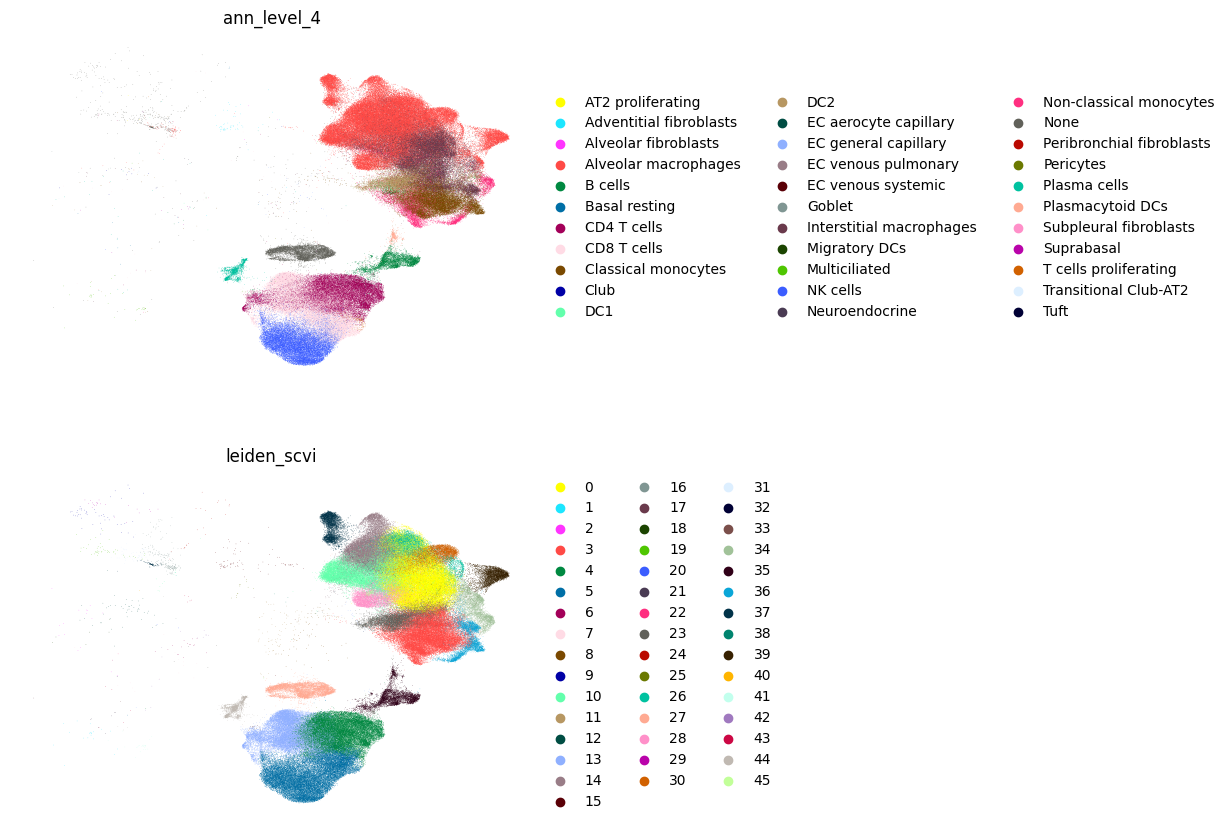

In [ ]:
sc.pl.umap(
    immune_adata,
    color=[ "ann_level_4", "leiden_scvi"],
    frameon=False,
    ncols=1,
    save="/../../../figures/umap__after_integration_subcluster_immune_nested.png"
)

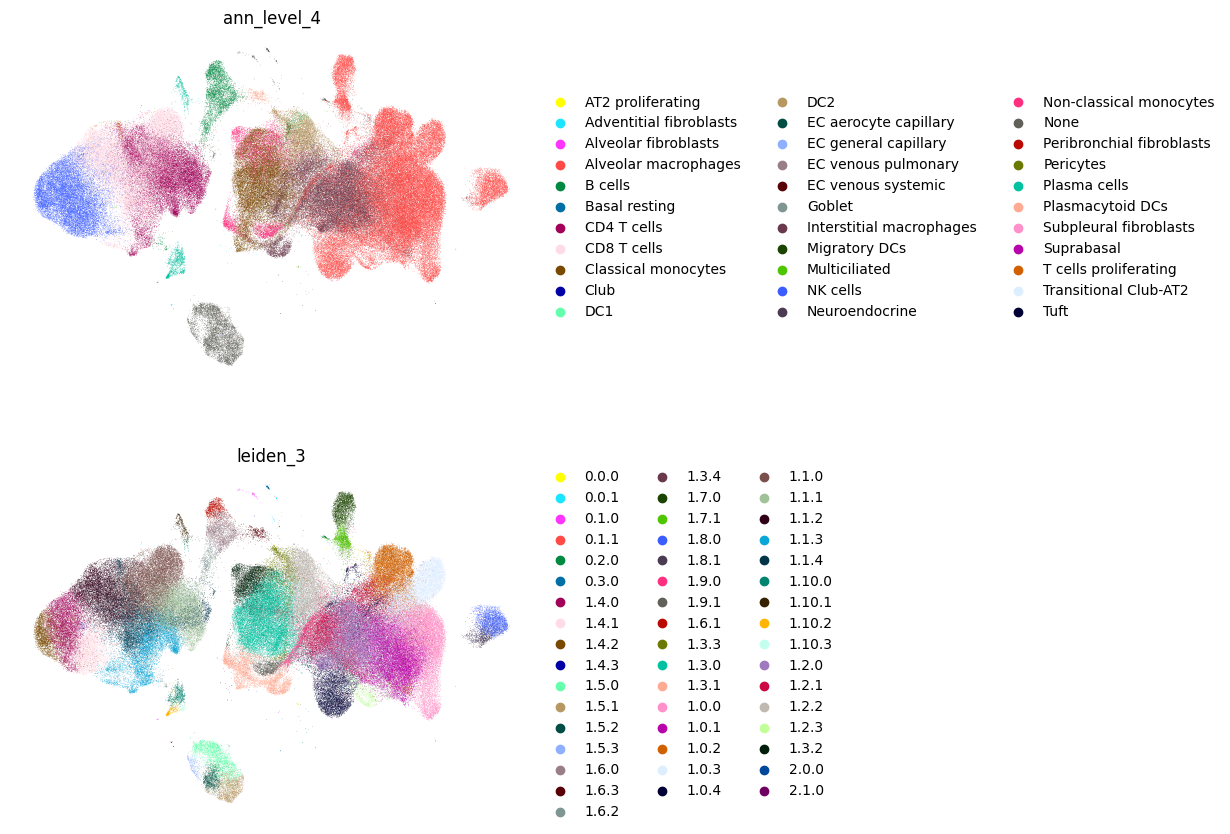

In [11]:
sc.pl.umap(
    immune_adata,
    color=[ "ann_level_4", "leiden_3"],
    frameon=False,
    ncols=1
    #save="/../../../figures/umap__after_integration_subcluster_immune_nested.png"
)

In [12]:
sc.tl.umap(immune_adata, min_dist=0.2)

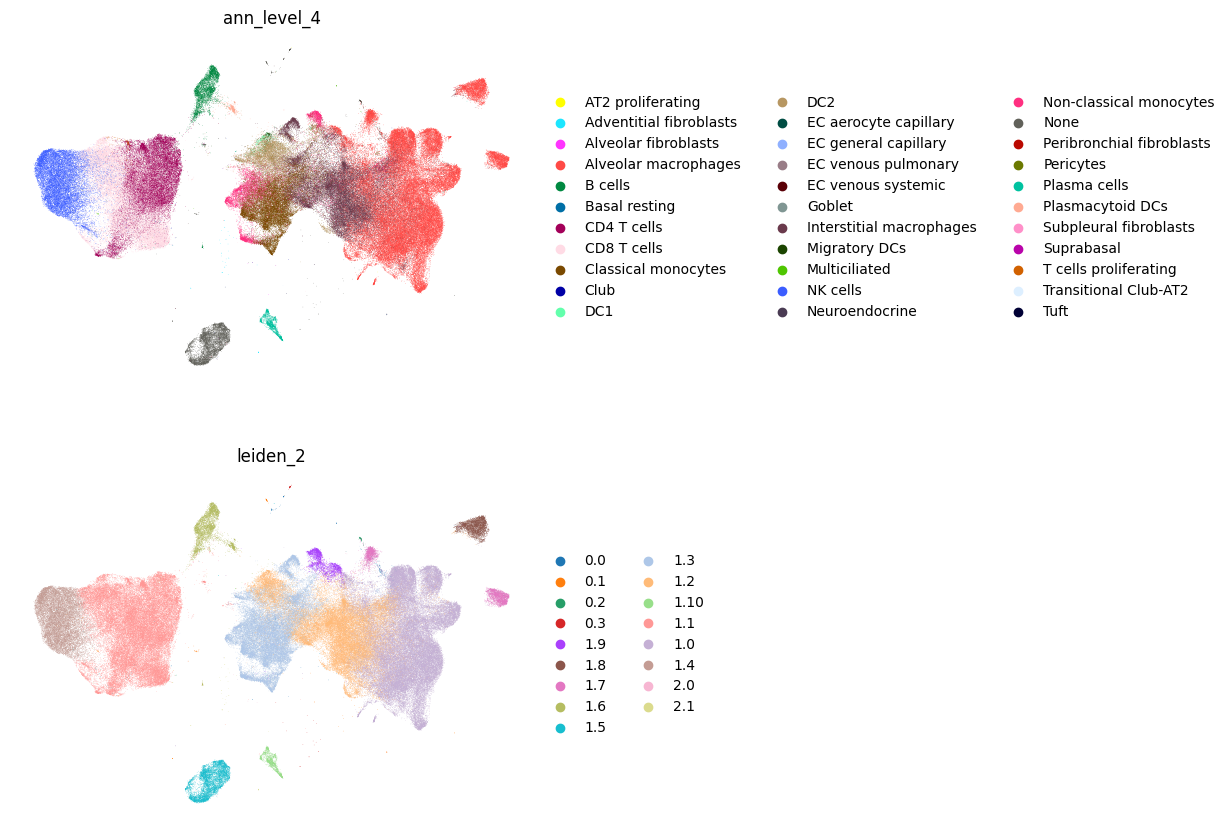

In [14]:
sc.pl.umap(
    immune_adata,
    color=[ "ann_level_4", "leiden_2"],
    frameon=False,
    ncols=1,
    save="/../../../figures/umap__after_integration_subcluster_immune_nested_umap0.2.png"
)

In [5]:
df = (
    pl.from_pandas(adata.obs[["ann_level_4"]], include_index=True)
        .unique(subset=["ann_level_4"])
)
df

shape: (39, 2)
┌─────────────────────────────────┬──────────────────────┐
│ None                            ┆ ann_level_4          │
│ ---                             ┆ ---                  │
│ str                             ┆ cat                  │
╞═════════════════════════════════╪══════════════════════╡
│ GTTCTCGGTGCCTGTG_F01851         ┆ AT2 proliferating    │
│ P2_2_TGTTCCGAGGCCCGTT           ┆ CD4 T cells          │
│ D372_Biop_Pro1_GATGCTATCGGAAAC… ┆ Deuterosomal         │
│ GCGACCATCCCTAACC_SC22           ┆ Alveolar macrophages │
│ D326_Biop_Pro1_CTACACCTCGGCGCA… ┆ Club                 │
│ …                               ┆ …                    │
│ GCTCTGTAGTGCTGCC_SC27           ┆ None                 │
│ P2_1_GCGCAACCAGTTAACC           ┆ NK cells             │
│ CACACTCTCCTAGAAC_HD67           ┆ Plasma cells         │
│ CTTGATTGTCAGTTTG_T164           ┆ Suprabasal           │
│ D339_Biop_Nas1_TACAGTGAGCACGCC… ┆ Tuft                 │
└─────────────────────────────────┴──────────────────────┘